In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import csv
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer



In [115]:
df = pd.read_csv("cog_train.csv")
df.head(10)

,job title,office location,department,salary offered for the job,company information,job description,job requirements,benefits,telecommuting,company logo exist?,has_questions,employment_type,experience required,education required,industry,function,fake?
0,Videographer / Editor / Photographer,"GB, LND, Notting Hill",NaN,NaN,Dreamers &amp; Creators is a creative agency t...,The Videographer / Editor / Photographer will ...,Minimum 1 year experience as an videographer /...,NaN,0,1,1,Full-time,Not Applicable,Unspecified,Apparel & Fashion,Art/Creative,no
1,Supply Chain Manager,"GR, I, Kifisia",Wholesale,NaN,Η πρώτη στεγασμένη αγορά παραγωγών με παντοπωλ...,Buyer will be in charge of expanding our vendo...,Skills required:MS-Office excellentExperience ...,In private,0,1,1,NaN,NaN,NaN,NaN,NaN,no
2,Digital Project Manager,"US, CA, El Segundo",Product Development,NaN,ConsumerTrack is a technology-centric internet...,We are looking for a Digital Project Manager t...,2+ years of project management experience in w...,Competitive salary with excellent growth oppor...,0,1,1,NaN,NaN,NaN,NaN,NaN,no
3,Global Communications Manager,"GB, LND, London",Marketing,NaN,Founded in 2010 by a team from Google’s London...,"Qubit: Cutting Edge Big Data EngineeringQubit,...",Who You AreBy submitting your application you ...,Plenty of perksAs well as the opportunity to s...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Marketing,no
4,S3I Candidates,"LT, ,",All,NaN,NaN,Adform is a premier partner for media agencies...,DCO Team in Kaunas:Front End Developer #URL_82...,NaN,0,1,0,Full-time,NaN,NaN,Information Technology and Services,NaN,no
5,Construction Analyst Safety,"GB, LND, London",Oil and Gas,70000-90000,Middle East Recruitment is a specialized recru...,Major Oil &amp; Gas Company in the Kingdom of ...,BS degree in engineering with minimum 6 years’...,"Salary up to total £90k, inclusive of allowanc...",0,1,1,Full-time,Mid-Senior level,High School or equivalent,Construction,Engineering,no
6,Job Fair,"US, NJ, Secaucus",HR,NaN,The RealReal is changing the way people buy an...,"JOB FAIR AT THE REALREAL When: Wednesday, Sept...",NaN,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,no
7,Auditor,"US, MA, Boston",NaN,NaN,We Provide Full Time Permanent Positions for m...,(We have more than 1500+ Job openings in our w...,NaN,NaN,0,0,0,Full-time,NaN,NaN,Accounting,NaN,no
8,English Teacher Abroad,"US, NE, Omaha",NaN,NaN,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,See job description,0,1,1,Contract,NaN,Bachelor's Degree,Education Management,NaN,no
9,Personal Care Worker - Community Living Assistant,"US, WI, Spooner",NaN,NaN,Hawkeye Recruitment provides cost effective re...,Looking for a change? Aurora Community Service...,Position Qualifications/Requirements:Applicant...,NaN,0,1,0,Full-time,Entry level,High School or equivalent,Hospital & Health Care,Health Care Provider,no


In [116]:
df_test = pd.read_csv("cog_test.csv")
df_test.head(10)

,job title,office location,department,salary offered for the job,company information,job description,job requirements,benefits,telecommuting,company logo exist?,has_questions,employment_type,experience required,education required,industry,function,fake?
0,Commercial/Industrial Construction Superintendent,"US, WA, Skagit County",NaN,NaN,NaN,Seeking qualified candidates for a full-time s...,Minimum five years of construction management ...,"401K, company vehicle, health, vision and dent...",0,0,1,Full-time,NaN,Unspecified,Construction,Management,no
1,Title Closer / Settlement Agent,"US, VA, Richmond",NaN,NaN,Network Closing Services has been serving Lend...,Looking for a change? Not happy where you are...,Are you a top Closer in your market? Are you a...,"We provide a fun and rewarding atmosphere, our...",0,1,1,Full-time,Mid-Senior level,NaN,Real Estate,NaN,no
2,Back-end Developer,"NL, NH, Amsterdam",IT,NaN,About the CompanyWe are ticketscript - the Eur...,About the CompanyWe are ticketscript - the Eur...,Your profileThe basics- 5+ years of experience...,Our offerA competitive salary within an intern...,0,1,0,Full-time,Associate,NaN,Computer Software,Information Technology,no
3,Full-time Web Developer,"PH, ,",NaN,528000-636000,NaN,#NAME?,- Must have extensive knowledge of CMS framewo...,NaN,0,1,0,Full-time,Not Applicable,Unspecified,Information Technology and Services,Information Technology,no
4,Program Manager,"US, CA, Mountain View",NaN,NaN,"Come be a part of one of the fastest growing, ...",We are looking for a Program Manager who can h...,Desired skills…10+ years of industry experienc...,Competitive base salaryStock OptionsFull benef...,0,1,1,Full-time,NaN,NaN,NaN,NaN,no
5,Big Data Technologies - Snr Dev,"GB, LND, london",NaN,NaN,Adthena is the UK’s leading competitive intell...,Do you want to work in the Big Data space with...,You should be a smart senior developer who lov...,"In return we'll pay you well, give you some ow...",0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Marketing and Advertising,Information Technology,no
6,Global Social Media Marketing Manager,"CA, ON, Toronto",NaN,NaN,Luxy Hair is a customer-centric hair extension...,Luxy Hair is a customer-centric hair extension...,Have at least 1 year of relevant work experien...,Competitive Salary,0,1,1,Full-time,Not Applicable,Unspecified,Retail,Marketing,no
7,Product Design Internship,"NZ, N, Auckland",NaN,15000-30000,Frustrated with the status quo?Like to re-imag...,Want to get a head start on your peers and be ...,Our Ideal Candidate wouldBe pursuing an indust...,We hope that this internship provides an excit...,0,1,1,Part-time,Internship,Some College Coursework Completed,Consumer Electronics,Design,no
8,45 min Veteran Interview - $100 gift card,"US, OK, oklahoma city",NaN,NaN,NaN,Make the Connection is seeking veterans for a ...,USA Veteran located in or near Oklahoma City.,$100 gift card in appreciation of your time. Y...,0,0,0,Temporary,Not Applicable,NaN,NaN,NaN,no
9,Data Entry,"US, AL, califonia",NaN,NaN,NaN,Welcome to one of the toughest and most fulfil...,RequirementsRequirements:High school diploma o...,"Health, Dental, Life and AD&amp;D Insurance, E...",0,0,0,Part-time,Entry level,Master's Degree,Consumer Services,Data Analyst,yes


In [117]:
df['fake?'] = df['fake?'].map({'yes': 1, 'no': 0})
df_test['fake?'] = df_test['fake?'].map({'yes': 1, 'no': 0})

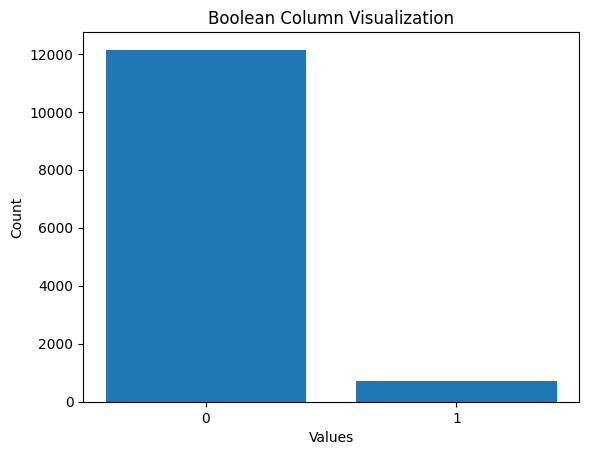

In [118]:
counts = df['fake?'].value_counts()

# create a bar chart
plt.bar(counts.index.astype(str), counts.values)
plt.xlabel('Values')
plt.ylabel('Count')
plt.title('Boolean Column Visualization')
plt.show()

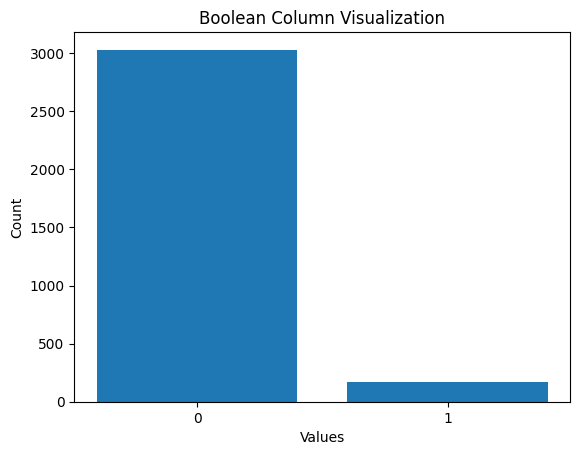

In [119]:
counts = df_test['fake?'].value_counts()

# create a bar chart
plt.bar(counts.index.astype(str), counts.values)
plt.xlabel('Values')
plt.ylabel('Count')
plt.title('Boolean Column Visualization')
plt.show()

In [120]:
df.isnull().sum()

job title                         0
office location                 259
department                     8260
salary offered for the job    10752
company information            2405
                              ...  
experience required            5086
education required             5853
industry                       3546
function                       4659
fake?                             0
Length: 17, dtype: int64

In [121]:
df_test.isnull().sum()

job title                        0
office location                 45
department                    2083
salary offered for the job    2693
company information            577
                              ... 
experience required           1225
education required            1406
industry                       837
function                      1122
fake?                            0
Length: 17, dtype: int64

In [122]:
df['office location'] = df['office location'].fillna(value = df['office location'].value_counts().index[0] )
df_test['office location'] = df_test['office location'].fillna(value = df_test['office location'].value_counts().index[0] )

In [123]:
for idx in (df[df['department'].isna()]['job title'].index) :
    
    df.at[idx , 'department'] = df.at[idx , 'job title']



for idx in (df_test[df_test['department'].isna()]['job title'].index) :
    
    df_test.at[idx , 'department'] = df_test.at[idx , 'job title']

In [124]:
for idx in (df['salary offered for the job'].dropna()).index :
    Range = df.at[idx , 'salary offered for the job'].split('-')
    start = int(Range[0])
    if start < 1000 :
        df.at[idx ,'salary offered for the job' ] = 0
    elif start > 1000 :
        df.at[idx ,'salary offered for the job' ] = start
        
    else:
        df.at[idx ,'salary offered for the job' ] = 0
        
df['salary offered for the job'] = df['salary offered for the job'].fillna(0)


for idx in (df_test['salary offered for the job'].dropna()).index :
    Range = df_test.at[idx , 'salary offered for the job'].split('-')
    start = int(Range[0])
    if start < 1000 :
        df_test.at[idx ,'salary offered for the job' ] = 0
    elif start > 1000 :
        df_test.at[idx ,'salary offered for the job' ] = start
        
    else:
        df_test.at[idx ,'salary offered for the job' ] = 0
        
df_test['salary offered for the job'] = df_test['salary offered for the job'].fillna(0)

In [125]:
df[['company information' , 'job description','job requirements','benefits']] = df[['company information' , 'job description','job requirements','benefits']].fillna('no available data')
df_test[['company information' , 'job description','job requirements','benefits']] = df_test[['company information' , 'job description','job requirements','benefits']].fillna('no available data')

In [126]:
df.isnull().sum()

job title                        0
office location                  0
department                       0
salary offered for the job       0
company information              0
                              ... 
experience required           5086
education required            5853
industry                      3546
function                      4659
fake?                            0
Length: 17, dtype: int64

In [127]:
df_test.isnull().sum()

job title                        0
office location                  0
department                       0
salary offered for the job       0
company information              0
                              ... 
experience required           1225
education required            1406
industry                       837
function                      1122
fake?                            0
Length: 17, dtype: int64

In [128]:
df[['industry' , 'function']] = df[['industry' , 'function']].fillna('')
df['job_field'] = df['job title'] +' '+ df['department'] +' '+ df['industry'] +' '+ df['function']
df.drop(['job title','department','industry','function'] , axis = 1 , inplace = True )


In [129]:
df_test[['industry' , 'function']] = df_test[['industry' , 'function']].fillna('')
df_test['job_field'] = df_test['job title'] +' '+ df_test['department'] +' '+ df_test['industry'] +' '+ df_test['function']
df_test.drop(['job title','department','industry','function'] , axis = 1 , inplace = True )

In [130]:
df[['employment_type','experience required','education required']] = df[['employment_type','experience required','education required']].fillna('Other')
df_test[['employment_type','experience required','education required']] = df_test[['employment_type','experience required','education required']].fillna('Other')

In [131]:
df['Job requirements'] = df['job requirements'] +' ' + df['experience required'] +' ' + df['education required']
df.drop(['job requirements','experience required','education required'],axis =  1 ,inplace = True )

In [132]:
df_test['Job requirements'] = df_test['job requirements'] +' ' + df_test['experience required'] +' ' + df_test['education required']
df_test.drop(['job requirements','experience required','education required'],axis =  1 ,inplace = True )

In [133]:
df['alldaza'] = df['Job requirements'] +' ' + df['job_field'] 
df_test['alldaza'] = df_test['Job requirements'] +' ' + df_test['job_field'] 

In [134]:
df.isnull().sum()

office location               0
salary offered for the job    0
company information           0
job description               0
benefits                      0
                             ..
employment_type               0
fake?                         0
job_field                     0
Job requirements              0
alldaza                       0
Length: 13, dtype: int64

In [135]:
df_test.isnull().sum()

office location               0
salary offered for the job    0
company information           0
job description               0
benefits                      0
                             ..
employment_type               0
fake?                         0
job_field                     0
Job requirements              0
alldaza                       0
Length: 13, dtype: int64

# TextPreprocessing 

In [136]:
import re
from nltk.corpus import stopwords 
import string 
from nltk.stem import WordNetLemmatizer
punc = string.punctuation
lmt = WordNetLemmatizer()
s_words = stopwords.words('english')

In [137]:
def Clean(df) :
    df_copy = df.copy(deep = True)
    text_cols = list(df_copy.select_dtypes(include = ['object']).columns)
    for col in text_cols :
        for idx, text in enumerate(df_copy[col]) :
            te = []
            word = re.sub(r'(@|#)\w+' , '' , text)
            word = re.sub("[,.]", "", word)
            word = re.sub(r'https?://\S+' , '' , word)
            word = re.sub(r'(\?|!)+' , '' , word)
            word = re.sub(r"\(|\)", "", word)
            word = re.sub(r'(^\s+)' , '' , word)
            word = re.sub(r'(\s+$)' , '' , word)
            word = re.sub(r'\d+' , '' , word)
            word = word.split()
            for i in word :
                if (i not in s_words):
                    i = i.lower()
                    i = lmt.lemmatize(i , 'v')
                    te.append(i)
            df_copy.at[idx , col] = te
    return df_copy

    

# le3b hna kman


#### Train

In [138]:
pd.options.display.max_rows = 10

df_cleaned = Clean(df)
df_cleaned.head(10)

,office location,salary offered for the job,company information,job description,benefits,telecommuting,company logo exist?,has_questions,employment_type,fake?,job_field,Job requirements,alldaza
0,"[gb, lnd, notting, hill]",0,"[dreamers, &amp;, creators, creative, agency, ...","[the, videographer, /, editor, /, photographer...","[available, data]",0,1,1,[full-time],0,"[videographer, /, editor, /, photographer, vid...","[minimum, year, experience, videographer, /, e...","[minimum, year, experience, videographer, /, e..."
1,"[gr, i, kifisia]",0,"[η, πρώτη, στεγασμένη, αγορά, παραγωγών, με, π...","[buyer, charge, expand, vendors, manage, purch...","[in, private]",0,1,1,[other],0,"[supply, chain, manager, wholesale]","[skills, required:ms-office, excellentexperien...","[skills, required:ms-office, excellentexperien..."
2,"[us, ca, el, segundo]",0,"[consumertrack, technology-centric, internet, ...","[we, look, digital, project, manager, lifecycl...","[competitive, salary, excellent, growth, oppor...",0,1,1,[other],0,"[digital, project, manager, product, development]","[+, years, project, management, experience, we...","[+, years, project, management, experience, we..."
3,"[gb, lnd, london]",0,"[found, team, google’s, london, new, york, off...","[qubit:, cut, edge, big, data, engineeringqubi...","[plenty, perksas, well, opportunity, solve, co...",0,1,1,[full-time],0,"[global, communications, manager, market, inte...","[who, you, areby, submit, application, underst...","[who, you, areby, submit, application, underst..."
4,[lt],0,"[available, data]","[adform, premier, partner, media, agencies, tr...","[available, data]",0,1,0,[full-time],0,"[si, candidates, all, information, technology,...","[dco, team, kaunas:front, end, developer, #, r...","[dco, team, kaunas:front, end, developer, #, r..."
5,"[gb, lnd, london]",70000,"[middle, east, recruitment, specialize, recrui...","[major, oil, &amp;, gas, company, kingdom, sau...","[salary, total, £k, inclusive, allowance, tax,...",0,1,1,[full-time],0,"[construction, analyst, safety, oil, gas, cons...","[bs, degree, engineer, minimum, years’, experi...","[bs, degree, engineer, minimum, years’, experi..."
6,"[us, nj, secaucus]",0,"[the, realreal, change, way, people, buy, sell...","[job, fair, at, the, realreal, when:, wednesda...","[available, data]",0,1,0,[other],0,"[job, fair, hr]","[available, data, other, other]","[available, data, other, other, job, fair, hr]"
7,"[us, ma, boston]",0,"[we, provide, full, time, permanent, position,...","[we, +, job, open, website, relevant, job, fee...","[available, data]",0,0,0,[full-time],0,"[auditor, auditor, account]","[available, data, other, other]","[available, data, other, other, auditor, audit..."
8,"[us, ne, omaha]",0,"[we, help, teachers, get, safe, &amp;, secure,...","[play, kid, get, pay, love, travel, job, asia$...","[see, job, description]",0,1,1,[contract],0,"[english, teacher, abroad, english, teacher, a...","[university, degree, require, tefl, /, tesol, ...","[university, degree, require, tefl, /, tesol, ..."
9,"[us, wi, spooner]",0,"[hawkeye, recruitment, provide, cost, effectiv...","[look, change, aurora, community, service, opp...","[available, data]",0,1,0,[full-time],0,"[personal, care, worker, -, community, live, a...","[position, qualifications/requirements:applica...","[position, qualifications/requirements:applica..."


#### Test

In [139]:
pd.options.display.max_rows = 10

df_cleaned_test = Clean(df_test)
df_cleaned_test.head(10)

,office location,salary offered for the job,company information,job description,benefits,telecommuting,company logo exist?,has_questions,employment_type,fake?,job_field,Job requirements,alldaza
0,"[us, wa, skagit, county]",0,"[available, data]","[seek, qualify, candidates, full-time, superin...","[k, company, vehicle, health, vision, dental, ...",0,0,1,[full-time],0,"[commercial/industrial, construction, superint...","[minimum, five, years, construction, managemen...","[minimum, five, years, construction, managemen..."
1,"[us, va, richmond]",0,"[network, close, service, serve, lenders, real...","[look, change, not, happy, then, give, us, cal...","[we, provide, fun, reward, atmosphere, employe...",0,1,1,[full-time],0,"[title, closer, /, settlement, agent, title, c...","[be, top, closer, market, be, go-getter, able,...","[be, top, closer, market, be, go-getter, able,..."
2,"[nl, nh, amsterdam]",0,"[about, companywe, ticketscript, -, european, ...","[about, companywe, ticketscript, -, european, ...","[our, offera, competitive, salary, within, int...",0,1,0,[full-time],0,"[back-end, developer, it, computer, software, ...","[your, profilethe, basics-, +, years, experien...","[your, profilethe, basics-, +, years, experien..."
3,[ph],528000,"[available, data]",[],"[available, data]",0,1,0,[full-time],0,"[full-time, web, developer, full-time, web, de...","[-, must, extensive, knowledge, cms, framework...","[-, must, extensive, knowledge, cms, framework..."
4,"[us, ca, mountain, view]",0,"[come, part, one, fastest, grow, well-funded, ...","[we, look, program, manager, help, support, oe...","[competitive, base, salarystock, optionsfull, ...",0,1,1,[full-time],0,"[program, manager, program, manager]","[desire, skills…+, years, industry, experience...","[desire, skills…+, years, industry, experience..."
5,"[gb, lnd, london]",0,"[adthena, uk’s, lead, competitive, intelligenc...","[do, want, work, big, data, space, distribute,...","[in, return, we'll, pay, well, give, ownership...",0,1,0,[full-time],0,"[big, data, technologies, -, snr, dev, big, da...","[you, smart, senior, developer, love, get, thi...","[you, smart, senior, developer, love, get, thi..."
6,"[ca, on, toronto]",0,"[luxy, hair, customer-centric, hair, extension...","[luxy, hair, customer-centric, hair, extension...","[competitive, salary]",0,1,1,[full-time],0,"[global, social, media, market, manager, globa...","[have, least, year, relevant, work, experience...","[have, least, year, relevant, work, experience..."
7,"[nz, n, auckland]",15000,"[frustrate, status, quolike, re-imagine, whats...","[want, get, head, start, peer, part, globally,...","[we, hope, internship, provide, excite, opport...",0,1,1,[part-time],0,"[product, design, internship, product, design,...","[our, ideal, candidate, wouldbe, pursue, indus...","[our, ideal, candidate, wouldbe, pursue, indus..."
8,"[us, ok, oklahoma, city]",0,"[available, data]","[make, connection, seek, veterans, minute, tap...","[$, gift, card, appreciation, time, your, inte...",0,0,0,[temporary],0,"[min, veteran, interview, -, $, gift, card, mi...","[usa, veteran, locate, near, oklahoma, city, n...","[usa, veteran, locate, near, oklahoma, city, n..."
9,"[us, al, califonia]",0,"[available, data]","[welcome, one, toughest, fulfil, ways, help, p...","[health, dental, life, ad&amp;d, insurance, em...",0,0,0,[part-time],1,"[data, entry, data, entry, consumer, service, ...","[requirementsrequirements:high, school, diplom...","[requirementsrequirements:high, school, diplom..."


## Elle3b kolo


### N-Grams(Train)


In [140]:
n = 2 # best parameter for n-grams
df_cleaned['ngrams'] = df_cleaned['alldaza'].apply(lambda x: [' '.join(x[i:i+n]) for i in range(len(x)-n+1)])

In [141]:
df_cleaned['ngrams'].head(10)

0    [minimum year, year experience, experience vid...
1    [skills required:ms-office, required:ms-office...
2    [+ years, years project, project management, m...
3    [who you, you areby, areby submit, submit appl...
4    [dco team, team kaunas:front, kaunas:front end...
5    [bs degree, degree engineer, engineer minimum,...
6    [available data, data other, other other, othe...
7    [available data, data other, other other, othe...
8    [university degree, degree require, require te...
9    [position qualifications/requirements:applican...
Name: ngrams, dtype: object

### N-Grams(Test)


In [142]:
n = 2 # best parameter for n-grams
df_cleaned_test['ngrams'] = df_cleaned_test['alldaza'].apply(lambda x: [' '.join(x[i:i+n]) for i in range(len(x)-n+1)])

In [143]:
df_cleaned_test['ngrams'].head(10)

0    [minimum five, five years, years construction,...
1    [be top, top closer, closer market, market be,...
2    [your profilethe, profilethe basics-, basics- ...
3    [- must, must extensive, extensive knowledge, ...
4    [desire skills…+, skills…+ years, years indust...
5    [you smart, smart senior, senior developer, de...
6    [have least, least year, year relevant, releva...
7    [our ideal, ideal candidate, candidate wouldbe...
8    [usa veteran, veteran locate, locate near, nea...
9    [requirementsrequirements:high school, school ...
Name: ngrams, dtype: object

### bag of words(Train)

In [144]:
from collections import Counter

df_cleaned['BOW'] = df_cleaned['alldaza'].apply(lambda x: Counter(' '.join(x).split(" ")))

In [145]:
df_cleaned['BOW'].head(10)

0    {'minimum': 1, 'year': 1, 'experience': 1, 'vi...
1    {'skills': 1, 'required:ms-office': 1, 'excell...
2    {'+': 1, 'years': 1, 'project': 3, 'management...
3    {'who': 1, 'you': 1, 'areby': 1, 'submit': 1, ...
4    {'dco': 1, 'team': 1, 'kaunas:front': 1, 'end'...
5    {'bs': 1, 'degree': 1, 'engineer': 3, 'minimum...
6    {'available': 1, 'data': 1, 'other': 2, 'job':...
7    {'available': 1, 'data': 1, 'other': 2, 'audit...
8    {'university': 1, 'degree': 2, 'require': 1, '...
9    {'position': 1, 'qualifications/requirements:a...
Name: BOW, dtype: object

### bag of words(Test)

In [146]:
df_cleaned_test['BOW'] = df_cleaned_test['alldaza'].apply(lambda x: Counter(' '.join(x).split(" ")))

In [147]:
df_cleaned_test['BOW'].head(10)

0    {'minimum': 1, 'five': 1, 'years': 1, 'constru...
1    {'be': 3, 'top': 1, 'closer': 3, 'market': 2, ...
2    {'your': 1, 'profilethe': 1, 'basics-': 1, '+'...
3    {'-': 1, 'must': 2, 'extensive': 2, 'knowledge...
4    {'desire': 1, 'skills…+': 1, 'years': 2, 'indu...
5    {'you': 2, 'smart': 1, 'senior': 1, 'developer...
6    {'have': 1, 'least': 1, 'year': 1, 'relevant':...
7    {'our': 1, 'ideal': 1, 'candidate': 1, 'wouldb...
8    {'usa': 1, 'veteran': 3, 'locate': 1, 'near': ...
9    {'requirementsrequirements:high': 1, 'school':...
Name: BOW, dtype: object

### PART_OF _SPEECH(Train)

In [148]:
df_cleaned['POS'] = df_cleaned['alldaza'].apply(nltk.pos_tag)

In [149]:
df_cleaned['POS'].head(10)

0    [(minimum, JJ), (year, NN), (experience, NN), ...
1    [(skills, NNS), (required:ms-office, JJ), (exc...
2    [(+, CD), (years, NNS), (project, JJ), (manage...
3    [(who, WP), (you, PRP), (areby, VBP), (submit,...
4    [(dco, NN), (team, NN), (kaunas:front, VBD), (...
5    [(bs, NN), (degree, NN), (engineer, NN), (mini...
6    [(available, JJ), (data, NNS), (other, JJ), (o...
7    [(available, JJ), (data, NNS), (other, JJ), (o...
8    [(university, NN), (degree, NN), (require, VBP...
9    [(position, NN), (qualifications/requirements:...
Name: POS, dtype: object

### PART_OF _SPEECH(Test)

In [150]:
df_cleaned_test['POS'] = df_cleaned_test['alldaza'].apply(nltk.pos_tag)

In [151]:
df_cleaned_test['POS'].head(10)

0    [(minimum, JJ), (five, CD), (years, NNS), (con...
1    [(be, VB), (top, JJ), (closer, JJR), (market, ...
2    [(your, PRP$), (profilethe, JJ), (basics-, JJ)...
3    [(-, :), (must, MD), (extensive, VB), (knowled...
4    [(desire, NN), (skills…+, NN), (years, NNS), (...
5    [(you, PRP), (smart, VBP), (senior, JJ), (deve...
6    [(have, VB), (least, JJS), (year, NN), (releva...
7    [(our, PRP$), (ideal, JJ), (candidate, NN), (w...
8    [(usa, JJ), (veteran, NN), (locate, NN), (near...
9    [(requirementsrequirements:high, JJ), (school,...
Name: POS, dtype: object

# Save data

In [ ]:
df_cleaned.to_csv('Train_Data(Done).csv', index=False)
df_cleaned_test.to_csv('est_Data(Done).csv', index=False)

# Modeling(Train)

In [152]:
from sklearn.ensemble import RandomForestClassifier ,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier ,ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,recall_score,precision_score,f1_score ,classification_report, r2_score ,confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [153]:
vectorizer = CountVectorizer()

TrainX_ngrams = vectorizer.fit_transform(df_cleaned['ngrams'].apply(lambda x: ' '.join(x)))
TrainX_pos = vectorizer.fit_transform(df_cleaned['POS'].apply(lambda x: ' '.join(t[0] for t in x)))
TrainX_bow = vectorizer.fit_transform(df_cleaned['BOW'].apply(lambda x: ' '.join(x)))

In [154]:
list_of_models = [LogisticRegression() , KNeighborsClassifier() , 
                  DecisionTreeClassifier() ,ExtraTreeClassifier(), RandomForestClassifier(),ExtraTreesClassifier()]

list_of_trains =[TrainX_ngrams,TrainX_bow,TrainX_pos]

list_of_tains_names =['N-grams(Train)','Bag of words(Train)','Part of speech(Train)']

classification_report = pd.DataFrame(columns=['Accuracy','F1_score','Precision','Recall'])
y = df_cleaned['fake?']

for model in list_of_models :
    indx=0
    print(model)
    print("    ")
    for train in list_of_trains:
        
        x_train, x_test, y_train, y_test = train_test_split(train, y, test_size = 0.3 , random_state = 104)
        model = model.fit(x_train , y_train)
        to_pred = x_test
        pred = y_test
        title = 'Test'
        y_pred = model.predict(to_pred)
        acc = round(accuracy_score(pred , y_pred)*100,2)
        f1 = round(f1_score(pred , y_pred)*100,2)
        prec = round(precision_score(pred , y_pred)*100,2)
        recall = round(recall_score(pred , y_pred)*100,2)
        confusion = confusion_matrix(y_test, y_pred.round())

        print(list_of_tains_names[indx])
        print("    ")
        print("Accuracy:", acc, '%')
        print("Precision:",prec, '%')
        print("Recall:", recall, '%')
        print("F1 score:", f1, '%')
        print("Confusion matrix:\n", confusion)
        print("    ")
        indx=indx+1


    
#pd.options.display.max_rows = 15
classification_report


LogisticRegression()
    
N-grams(Train)
    
Accuracy: 97 %
Precision: 80 %
Recall: 65 %
F1 score: 72 %
Confusion matrix:
 [[3604   35]
 [  74  140]]
    
Bag of words(Train)
    
Accuracy: 97 %
Precision: 85 %
Recall: 57 %
F1 score: 69 %
Confusion matrix:
 [[3618   21]
 [  91  123]]
    
Part of speech(Train)
    
Accuracy: 97 %
Precision: 84 %
Recall: 61 %
F1 score: 71 %
Confusion matrix:
 [[3614   25]
 [  83  131]]
    
KNeighborsClassifier()
    
N-grams(Train)
    
Accuracy: 96 %
Precision: 65 %
Recall: 43 %
F1 score: 52 %
Confusion matrix:
 [[3589   50]
 [ 122   92]]
    
Bag of words(Train)
    
Accuracy: 95 %
Precision: 62 %
Recall: 45 %
F1 score: 52 %
Confusion matrix:
 [[3580   59]
 [ 117   97]]
    
Part of speech(Train)
    
Accuracy: 95 %
Precision: 63 %
Recall: 45 %
F1 score: 53 %
Confusion matrix:
 [[3582   57]
 [ 117   97]]
    
DecisionTreeClassifier()
    
N-grams(Train)
    
Accuracy: 96 %
Precision: 69 %
Recall: 57 %
F1 score: 63 %
Confusion matrix:
 [[3584   55]
 

,Accuracy,F1_score,Precision,Recall


# Modeling (Test)

In [157]:
vectorizer = CountVectorizer()

TrainX_ngrams_testdata = vectorizer.fit_transform(df_cleaned_test['ngrams'].apply(lambda x: ' '.join(x)))
TrainX_pos_testdata = vectorizer.fit_transform(df_cleaned_test['POS'].apply(lambda x: ' '.join(t[0] for t in x)))
TrainX_bow_testdata = vectorizer.fit_transform(df_cleaned_test['BOW'].apply(lambda x: ' '.join(x)))

In [164]:
list_of_models = [LogisticRegression() , KNeighborsClassifier() , 
                  DecisionTreeClassifier() ,ExtraTreeClassifier(), RandomForestClassifier(),ExtraTreesClassifier()]

list_of_tests = [TrainX_ngrams_testdata,TrainX_bow_testdata,TrainX_pos_testdata]

list_of_tains_names = ['N-grams(Test)','Bag of words(Test)','Part of speech(Test)']

classification_report = pd.DataFrame(columns=['Accuracy','F1_score','Precision','Recall'])
y = df_cleaned_test['fake?']

for model in list_of_models :
    indx=0
    print(model)
    print("    ")
    for test in list_of_tests:
        
        x_train, x_test, y_train, y_test = train_test_split(test, y, test_size = 0.3 , random_state = 104)
        model = model.fit(x_train , y_train)
        to_pred = x_test
        pred = y_test
        title = 'Test'
        y_pred = model.predict(to_pred)
        acc = round(accuracy_score(pred , y_pred)*100,2)
        f1 = round(f1_score(pred , y_pred)*100,2)
        prec = round(precision_score(pred , y_pred)*100,2)
        recall = round(recall_score(pred , y_pred)*100,2)
        confusion = confusion_matrix(y_test, y_pred.round())

        print(list_of_tains_names[indx])
        print("    ")
        print("Accuracy:", acc, '%')
        print("Precision:", prec, '%')
        print("Recall:",recall, '%')
        print("F1 score:", f1, '%')
        print("Confusion matrix:\n", confusion)
        print("    ")
        indx=indx+1


    
#pd.options.display.max_rows = 15
classification_report


LogisticRegression()
    
N-grams(Test)
    
Accuracy: 96.04 %
Precision: 67.86 %
Recall: 39.58 %
F1 score: 50.0 %
Confusion matrix:
 [[903   9]
 [ 29  19]]
    
Bag of words(Test)
    
Accuracy: 96.25 %
Precision: 80.0 %
Recall: 33.33 %
F1 score: 47.06 %
Confusion matrix:
 [[908   4]
 [ 32  16]]
    
Part of speech(Test)
    
Accuracy: 96.35 %
Precision: 80.95 %
Recall: 35.42 %
F1 score: 49.28 %
Confusion matrix:
 [[908   4]
 [ 31  17]]
    
KNeighborsClassifier()
    
N-grams(Test)
    
Accuracy: 96.25 %
Precision: 83.33 %
Recall: 31.25 %
F1 score: 45.45 %
Confusion matrix:
 [[909   3]
 [ 33  15]]
    
Bag of words(Test)
    
Accuracy: 96.04 %
Precision: 70.83 %
Recall: 35.42 %
F1 score: 47.22 %
Confusion matrix:
 [[905   7]
 [ 31  17]]
    
Part of speech(Test)
    
Accuracy: 96.04 %
Precision: 77.78 %
Recall: 29.17 %
F1 score: 42.42 %
Confusion matrix:
 [[908   4]
 [ 34  14]]
    
DecisionTreeClassifier()
    
N-grams(Test)
    
Accuracy: 96.15 %
Precision: 67.74 %
Recall: 43.75 %


,Accuracy,F1_score,Precision,Recall
